In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Machine Downtime.csv')

In [3]:
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,18-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,84.79,3.598776,7.188335,11.5,50.1,35.3,0.744,23.441,0.0,338.0,25.154223,2.57,Machine_Failure
1,24-11-2021,Makino-L3-Unit1-2015,Shopfloor-L3,88.64,6.560332,6.210167,6.1,44.4,36.8,0.815,24.067,0.0,328.0,29.005529,2.26,Machine_Failure
2,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,52.96,5.918357,7.275132,5.1,53.2,31.9,0.859,31.685,0.0,301.0,22.433250,2.92,Machine_Failure
3,19-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,73.85,6.560332,6.412568,32.8,52.8,33.2,0.891,35.373,0.0,393.0,23.157992,2.94,Machine_Failure
4,19-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,54.04,4.566854,5.581496,24.2,44.5,33.6,0.957,26.329,0.0,322.0,20.423615,3.13,Machine_Failure


In [4]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             2500 non-null   object 
 1   Machine_ID                       2500 non-null   object 
 2   Assembly_Line_No                 2500 non-null   object 
 3   Hydraulic_Pressure(bar)          2490 non-null   float64
 4   Coolant_Pressure(bar)            2481 non-null   float64
 5   Air_System_Pressure(bar)         2483 non-null   float64
 6   Coolant_Temperature              2488 non-null   float64
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64
 9   Spindle_Vibration(µm)            2489 non-null   float64
 10  Tool_Vibration(µm)               2489 non-null   float64
 11  Spindle_Speed(RPM)               2494 non-null   float64
 12  Voltage(volts)      

In [6]:
df['Machine_ID'].unique()

array(['Makino-L3-Unit1-2015', 'Makino-L1-Unit1-2013',
       'Makino-L2-Unit1-2015'], dtype=object)

In [7]:
df['Assembly_Line_No'].unique()

array(['Shopfloor-L3', 'Shopfloor-L1', 'Shopfloor-L2'], dtype=object)

In [8]:
df['Downtime'].unique()

array(['Machine_Failure', 'No_Machine_Failure'], dtype=object)

In [9]:
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [10]:
df.isnull()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2496,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
2497,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
2498,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False


In [11]:
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [12]:
print(df.isnull().sum().sum())

143


In [13]:
df.shape

(2500, 16)

In [14]:
print(df.duplicated().sum())  ## There is no duplicated values in the dataset

0


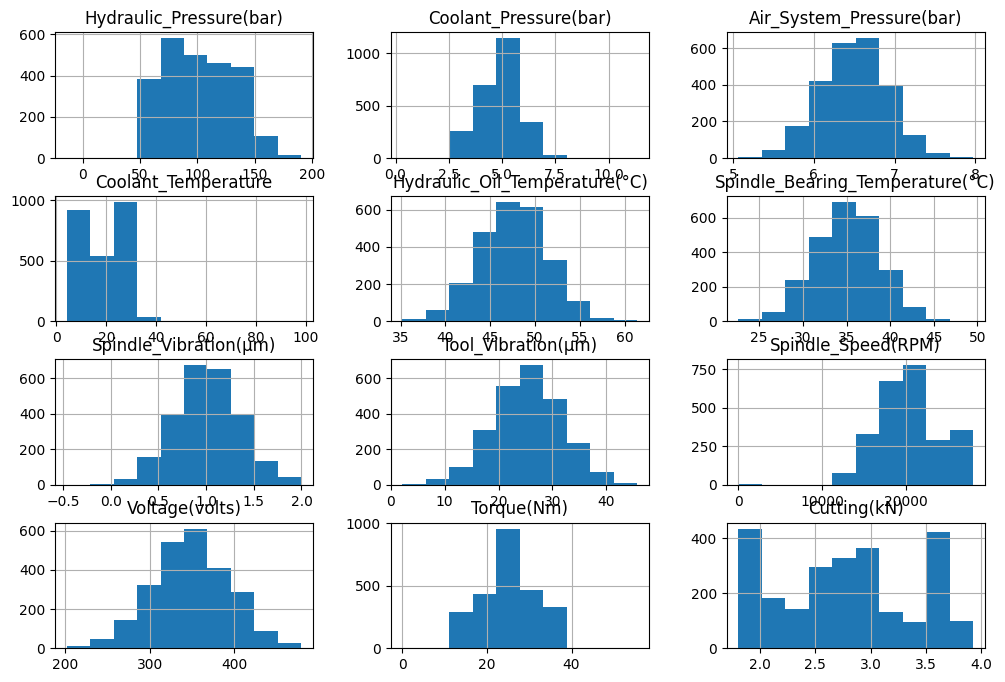

In [15]:
# Distribution of Numerical Feature
df.hist(figsize=(12,8))  
plt.show()

In [16]:
# Convert the 'Date' column to a consistent format (DD/MM/YYYY)
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True).dt.strftime('%d/%m/%Y')

In [17]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2500 non-null   datetime64[ns]
 1   Machine_ID                       2500 non-null   object        
 2   Assembly_Line_No                 2500 non-null   object        
 3   Hydraulic_Pressure(bar)          2490 non-null   float64       
 4   Coolant_Pressure(bar)            2481 non-null   float64       
 5   Air_System_Pressure(bar)         2483 non-null   float64       
 6   Coolant_Temperature              2488 non-null   float64       
 7   Hydraulic_Oil_Temperature(°C)    2484 non-null   float64       
 8   Spindle_Bearing_Temperature(°C)  2493 non-null   float64       
 9   Spindle_Vibration(µm)            2489 non-null   float64       
 10  Tool_Vibration(µm)               2489 non-null   float64    

In [19]:
# Verify transformation
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,2022-03-18,Makino-L3-Unit1-2015,Shopfloor-L3,84.79,3.598776,7.188335,11.5,50.1,35.3,0.744,23.441,0.0,338.0,25.154223,2.57,Machine_Failure
1,2021-11-24,Makino-L3-Unit1-2015,Shopfloor-L3,88.64,6.560332,6.210167,6.1,44.4,36.8,0.815,24.067,0.0,328.0,29.005529,2.26,Machine_Failure
2,2022-03-19,Makino-L1-Unit1-2013,Shopfloor-L1,52.96,5.918357,7.275132,5.1,53.2,31.9,0.859,31.685,0.0,301.0,22.433250,2.92,Machine_Failure
3,2022-03-19,Makino-L3-Unit1-2015,Shopfloor-L3,73.85,6.560332,6.412568,32.8,52.8,33.2,0.891,35.373,0.0,393.0,23.157992,2.94,Machine_Failure
4,2022-03-19,Makino-L1-Unit1-2013,Shopfloor-L1,54.04,4.566854,5.581496,24.2,44.5,33.6,0.957,26.329,0.0,322.0,20.423615,3.13,Machine_Failure


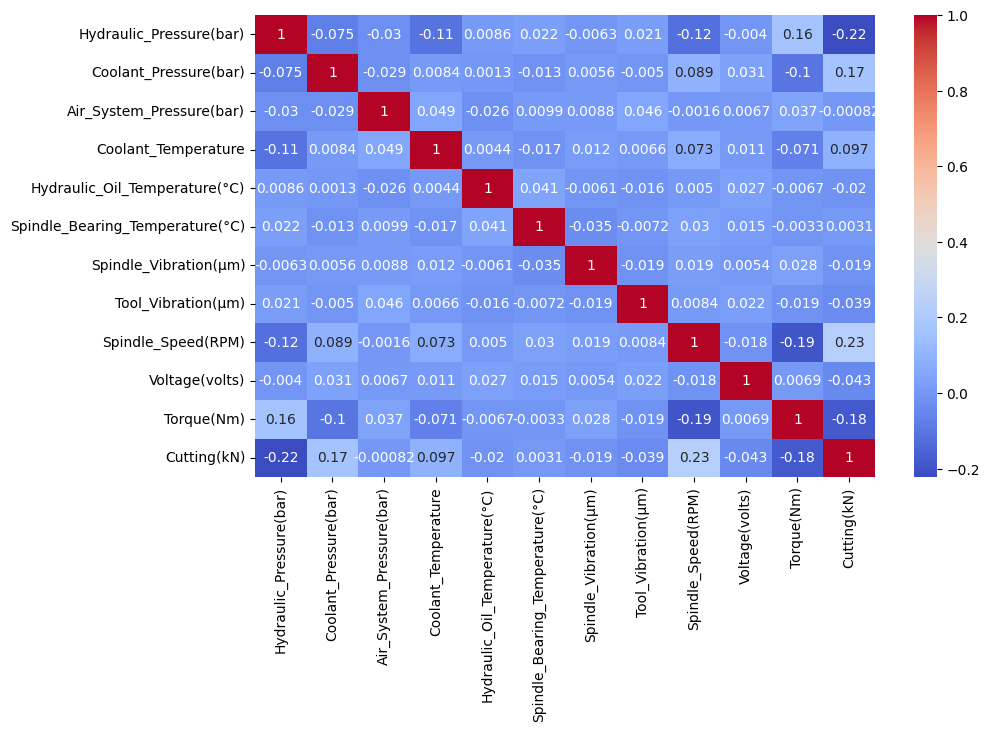

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])  

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [21]:
df.isnull().sum()

Date                                0
Machine_ID                          0
Assembly_Line_No                    0
Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(°C)      16
Spindle_Bearing_Temperature(°C)     7
Spindle_Vibration(µm)              11
Tool_Vibration(µm)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

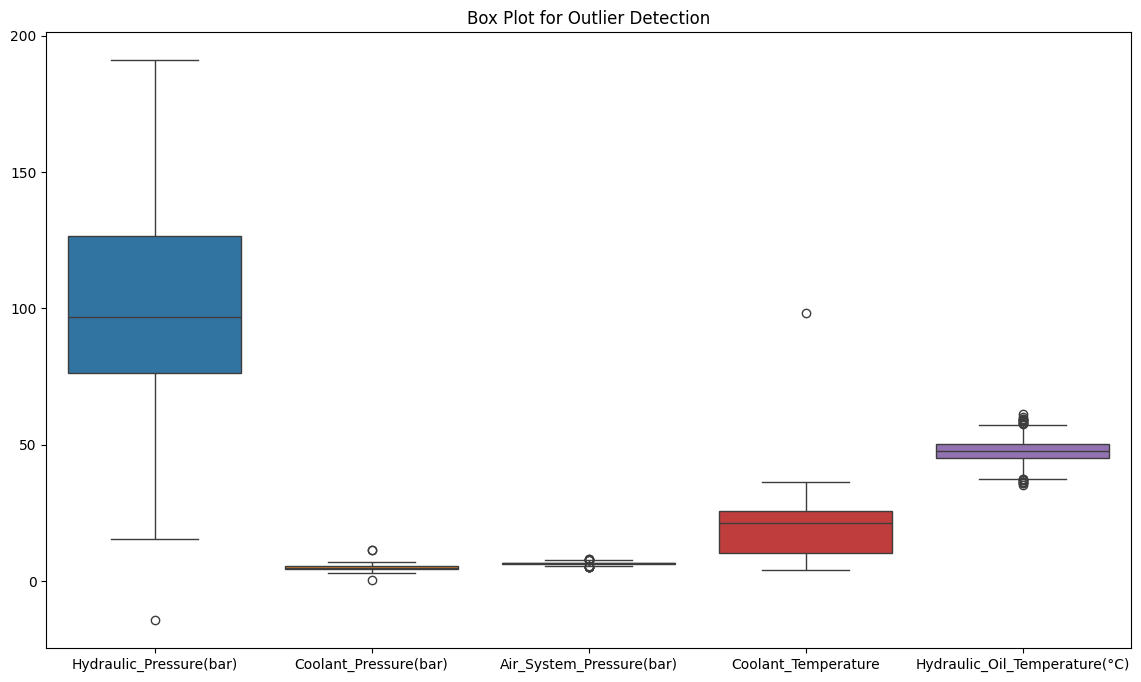

In [22]:
# Box plot for outlier detection
plt.figure(figsize=(14,8))
sns.boxplot(data=df[['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)','Air_System_Pressure(bar)', 'Coolant_Temperature','Hydraulic_Oil_Temperature(°C)']])
plt.title("Box Plot for Outlier Detection")
plt.show()

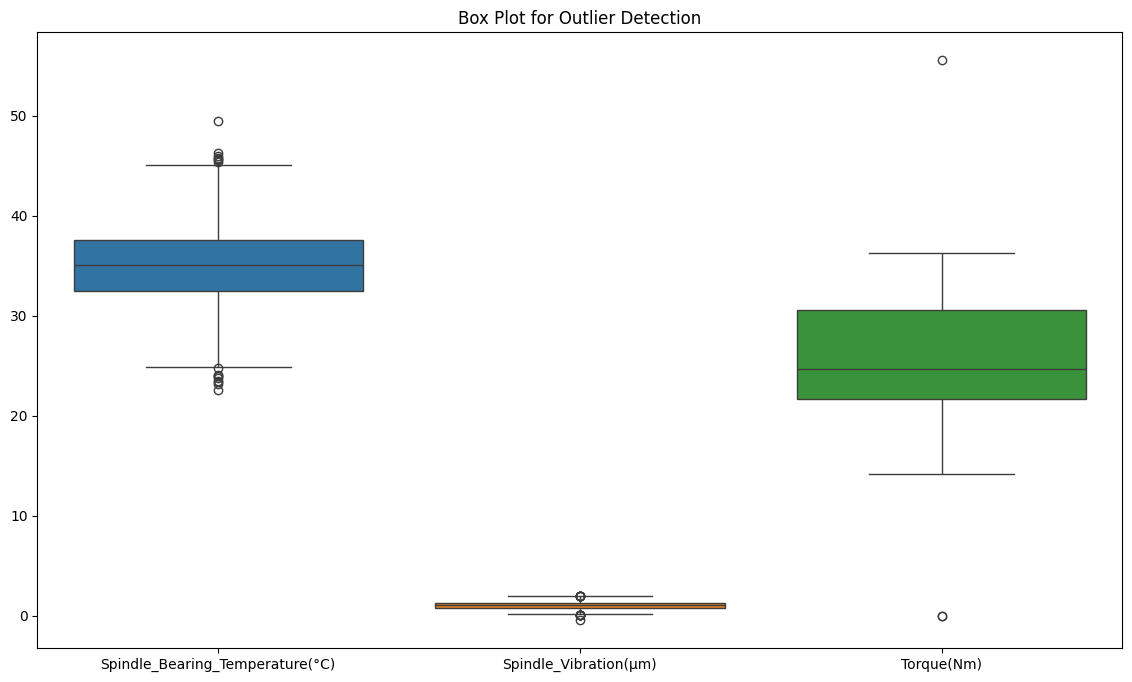

In [23]:
# Box plot for outlier detection
plt.figure(figsize=(14,8))
sns.boxplot(data=df[['Spindle_Bearing_Temperature(°C)','Spindle_Vibration(µm)','Torque(Nm)']])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [24]:
# To Count the Outliers
# List of columns with potential outliers
outlier_columns = [
    'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
    'Spindle_Vibration(µm)', 'Torque(Nm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
    'Voltage(volts)'
]

# Function to count outliers using IQR method
def count_outliers_iqr(df, columns):
    outlier_counts = {}  # Dictionary to store counts
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        outlier_counts[column] = len(outliers)
    
    return outlier_counts

# Get the count of outliers for each column
outlier_counts = count_outliers_iqr(df, outlier_columns)

# Print the result
for column, count in outlier_counts.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in Hydraulic_Pressure(bar): 1
Number of outliers in Coolant_Pressure(bar): 3
Number of outliers in Air_System_Pressure(bar): 13
Number of outliers in Coolant_Temperature: 1
Number of outliers in Hydraulic_Oil_Temperature(°C): 21
Number of outliers in Spindle_Bearing_Temperature(°C): 16
Number of outliers in Spindle_Vibration(µm): 15
Number of outliers in Torque(Nm): 3
Number of outliers in Tool_Vibration(µm): 17
Number of outliers in Spindle_Speed(RPM): 7
Number of outliers in Voltage(volts): 15


In [25]:
# List of columns with outliers
outlier_columns = [
    'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
    'Spindle_Vibration(µm)', 'Torque(Nm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
    'Voltage(volts)'
]

# Detecting outliers using IQR method
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Mask for outlier rows
outlier_mask = (df[outlier_columns] < (Q1 - 1.5 * IQR)) | (df[outlier_columns] > (Q3 + 1.5 * IQR))

# Replace outliers with median values
df.loc[outlier_mask.any(axis=1), outlier_columns] = df[outlier_columns].median()

# Confirm update
print("Outliers replaced with median values.")

Outliers replaced with median values.


In [26]:
import pandas as pd

# Detecting outliers using IQR method
Q1 = df[outlier_columns].quantile(0.25)
Q3 = df[outlier_columns].quantile(0.75)
IQR = Q3 - Q1

# Mask for outlier values (not rows)
outlier_mask = (df[outlier_columns] < (Q1 - 1.5 * IQR)) | (df[outlier_columns] > (Q3 + 1.5 * IQR))

# Replace only outlier values with column-wise median correctly
for col in outlier_columns:
    df.loc[outlier_mask[col], col] = df[col].median()

# Confirm update
print("Outliers replaced with median values correctly!")


Outliers replaced with median values correctly!


In [27]:
# List of columns with potential outliers
outlier_columns = [
    'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Bearing_Temperature(°C)',
    'Spindle_Vibration(µm)', 'Torque(Nm)', 'Tool_Vibration(µm)', 'Spindle_Speed(RPM)',
    'Voltage(volts)'
]

# Function to count outliers using IQR method
def count_outliers_iqr(df, columns):
    outlier_counts = {}  # Dictionary to store counts
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        outlier_counts[column] = len(outliers)
    
    return outlier_counts

# Get the count of outliers for each column
outlier_counts = count_outliers_iqr(df, outlier_columns)

# Print the result
for column, count in outlier_counts.items():
    print(f"Number of outliers in {column}: {count}")

Number of outliers in Hydraulic_Pressure(bar): 0
Number of outliers in Coolant_Pressure(bar): 0
Number of outliers in Air_System_Pressure(bar): 1
Number of outliers in Coolant_Temperature: 0
Number of outliers in Hydraulic_Oil_Temperature(°C): 0
Number of outliers in Spindle_Bearing_Temperature(°C): 0
Number of outliers in Spindle_Vibration(µm): 0
Number of outliers in Torque(Nm): 0
Number of outliers in Tool_Vibration(µm): 0
Number of outliers in Spindle_Speed(RPM): 0
Number of outliers in Voltage(volts): 0


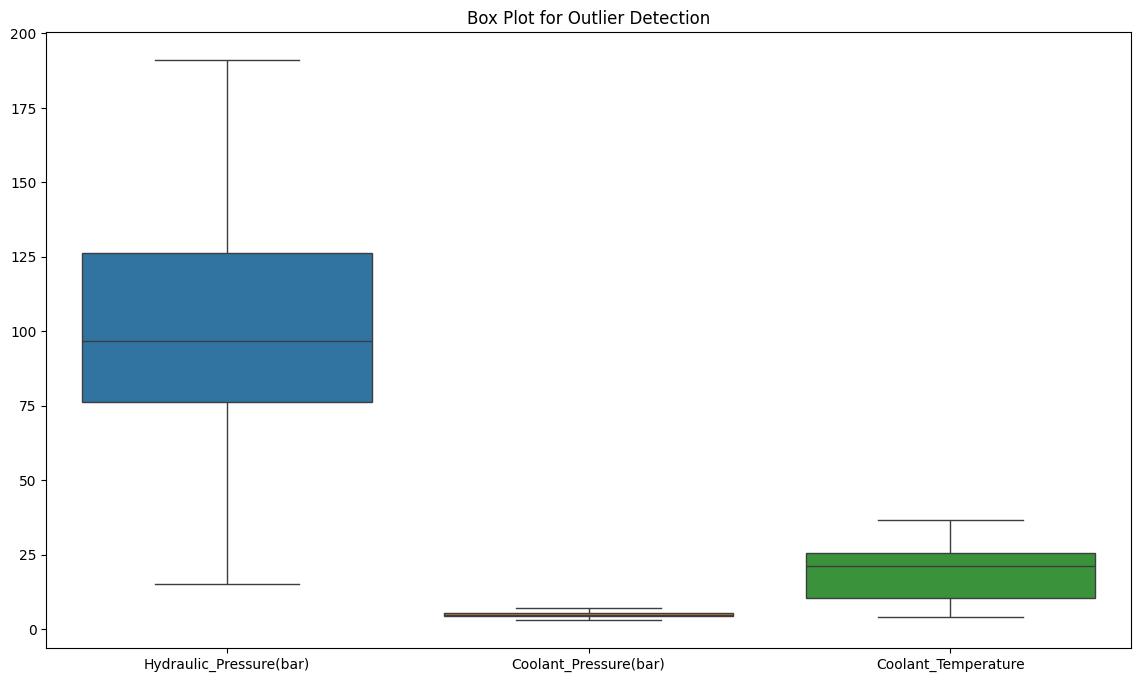

In [28]:
# Box plot for outlier detection
plt.figure(figsize=(14,8))
sns.boxplot(data=df[['Hydraulic_Pressure(bar)','Coolant_Pressure(bar)', 'Coolant_Temperature',]])
plt.title("Box Plot for Outlier Detection")
plt.show()

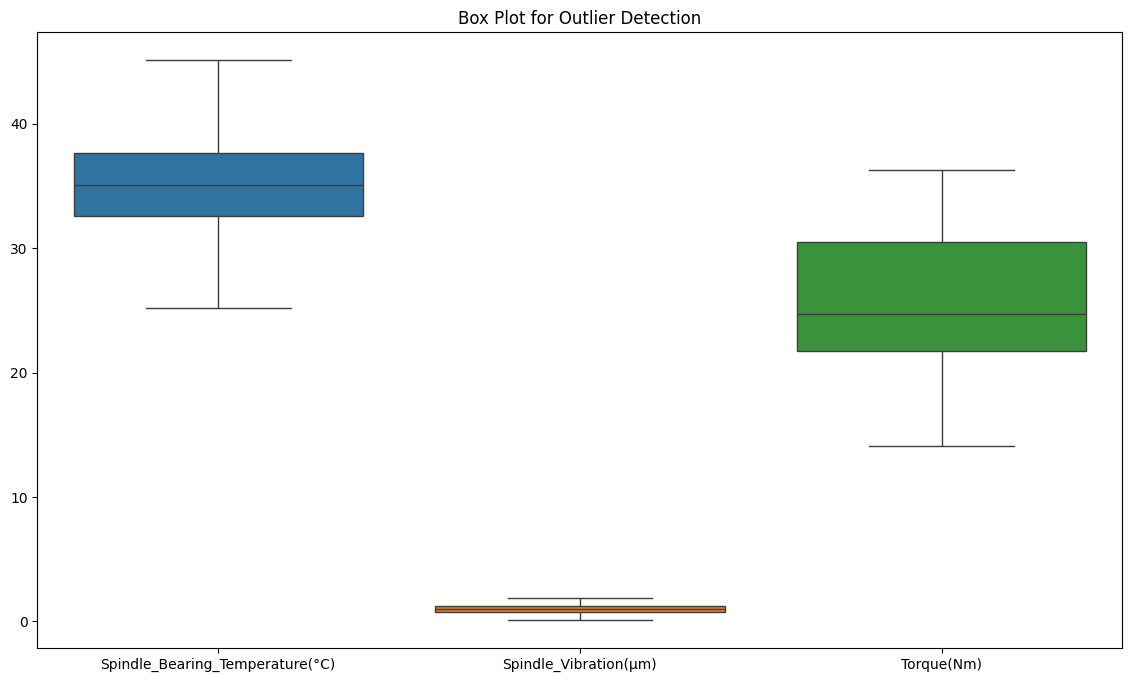

In [29]:
# Box plot for outlier detection
plt.figure(figsize=(14,8))
sns.boxplot(data=df[['Spindle_Bearing_Temperature(°C)','Spindle_Vibration(µm)','Torque(Nm)']])
plt.title("Box Plot for Outlier Detection")
plt.show()

In [30]:
# Drop Rows with Missing Values
df.dropna(subset=['Spindle_Bearing_Temperature(°C)', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Cutting(kN)'], inplace=True)

In [31]:
# Median Imputation to handle the null values
columns_to_impute = [
    'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)', 'Spindle_Vibration(µm)', 
    'Tool_Vibration(µm)','Torque(Nm)'
]
for col in columns_to_impute:
    df[col] = df[col].fillna(df[col].median())

In [32]:
df.isnull().sum()

Date                               0
Machine_ID                         0
Assembly_Line_No                   0
Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(°C)      0
Spindle_Bearing_Temperature(°C)    0
Spindle_Vibration(µm)              0
Tool_Vibration(µm)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

In [33]:
df.shape

(2366, 16)

## Univariate Plots (Single Feature Analysis)

### Histogram (Ideal for continuous numerical data)

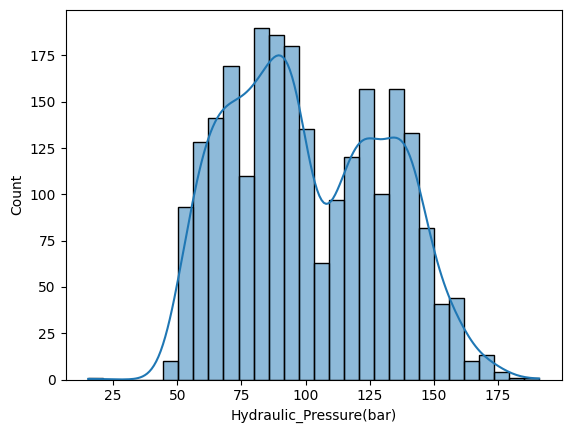

In [34]:
sns.histplot(df['Hydraulic_Pressure(bar)'], bins=30, kde=True)
plt.show()

 ### Box Plot (Detects outliers)

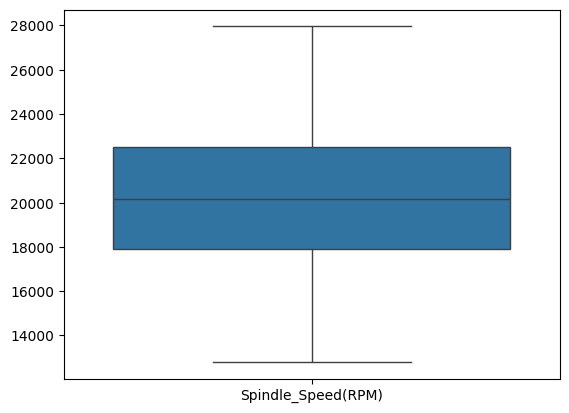

In [35]:
sns.boxplot(data=df[['Spindle_Speed(RPM)']])
plt.show()

### Density Plot (Shows probability distribution)

C:\Users\Asus\AppData\Local\Temp\ipykernel_19564\775206940.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Torque(Nm)'], shade = True)


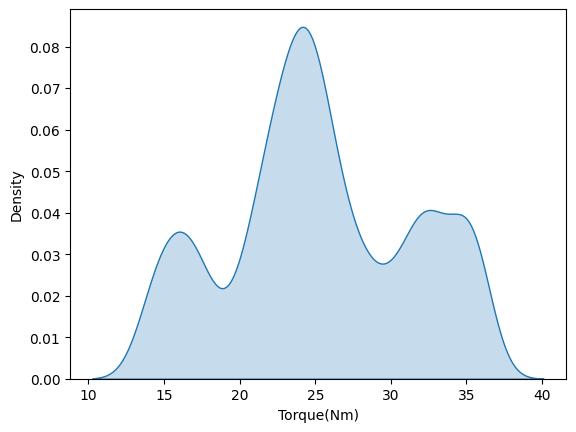

In [36]:
sns.kdeplot(df['Torque(Nm)'], shade = True)
plt.show()

### Q-Q Plot (Checks normal distribution)

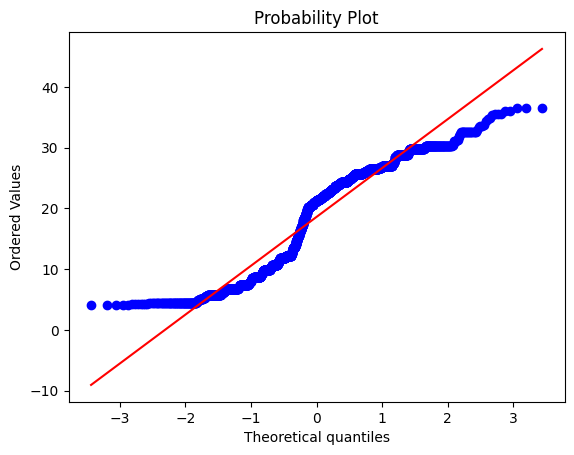

In [37]:
import scipy.stats as stats

stats.probplot(df['Coolant_Temperature'], dist="norm", plot=plt)
plt.show()

## Bivariate Plots (Relationship Between Two Features)

### Scatter Plot (Best for numerical variables to see trends)

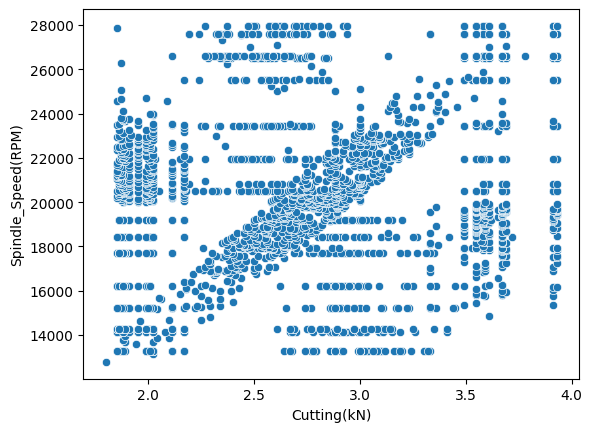

In [39]:
sns.scatterplot(x=df['Cutting(kN)'], y=df['Spindle_Speed(RPM)'])
plt.show()

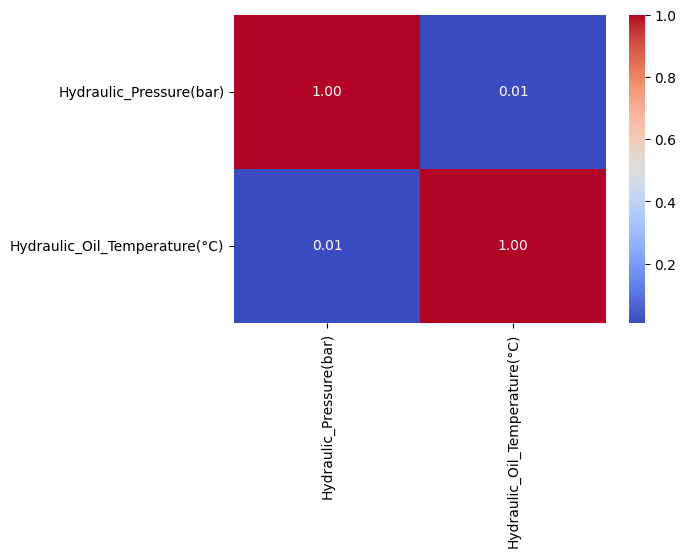

In [40]:
# Compute the correlation matrix
corr = df[['Hydraulic_Pressure(bar)', 'Hydraulic_Oil_Temperature(°C)']].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

# Display the heatmap
plt.show()


In [43]:
# Save the cleaned data to a CSV file
df.to_csv('cleaned_data.csv', index=False)